In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#Read in CSVs

measurements = pd.read_csv('Resources/hawaii_measurements.csv')
stations = pd.read_csv('Resources/hawaii_stations.csv')

In [13]:
#Look at rows of data and data types

print(measurements.head())
print(measurements.dtypes)
print("\n\n")
print(stations.head)
print(stations.dtypes)


       station        date  prcp  tobs
0  USC00519397  2010-01-01  0.08    65
1  USC00519397  2010-01-02  0.00    63
2  USC00519397  2010-01-03  0.00    74
3  USC00519397  2010-01-04  0.00    76
4  USC00519397  2010-01-06   NaN    73
station     object
date        object
prcp       float64
tobs         int64
dtype: object



<bound method NDFrame.head of        station                                    name  latitude  longitude  \
0  USC00519397                    WAIKIKI 717.2, HI US  21.27160 -157.81680   
1  USC00513117                    KANEOHE 838.1, HI US  21.42340 -157.80150   
2  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130 -157.83740   
3  USC00517948                       PEARL CITY, HI US  21.39340 -157.97510   
4  USC00518838              UPPER WAHIAWA 874.3, HI US  21.49920 -158.01110   
5  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US  21.33556 -157.71139   
6  USC00519281                     WAIHEE 837.5, HI US  21.45167 -157.84889   
7  USC00511

In [14]:
#Convert date column to date data type
measurements['date'] = measurements['date'].astype('datetime64[D]')

In [15]:
#Show that date conversion worked
print(measurements.dtypes)
print(measurements['date'].head())

station            object
date       datetime64[ns]
prcp              float64
tobs                int64
dtype: object
0   2010-01-01
1   2010-01-02
2   2010-01-03
3   2010-01-04
4   2010-01-06
Name: date, dtype: datetime64[ns]


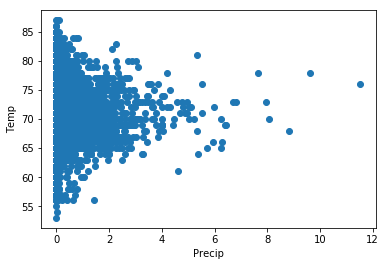

In [16]:
#This plot is used to check for temperature or precipitaion values that may have been entered in incorrectly. 
plt.scatter(measurements['prcp'],measurements['tobs'])
plt.ylabel("Temp")
plt.xlabel("Precip")
plt.show()

In [17]:
#Check for NaN values
print(measurements.count())
print(len(measurements))
print(stations.count())
print(len(stations))
#There are roughly 1,400 NaN values in the prcp field

station    19550
date       19550
prcp       18103
tobs       19550
dtype: int64
19550
station      9
name         9
latitude     9
longitude    9
elevation    9
dtype: int64
9


In [18]:
# I wrote this statement to see how the NaN values are distributed between stations.
# Station 'USC00517948' has about half the NaN values.
measurements.loc[measurements['prcp'].isnull(), :].loc[:,'station'].value_counts()


USC00517948    689
USC00514830    265
USC00518838    169
USC00516128    128
USC00519523     97
USC00511918     47
USC00519397     39
USC00513117     13
Name: station, dtype: int64

In [19]:
# Checking to see the total number of measurements in each station. If we compare the below value_counts 
# with the above value_counts we can see that even after removing the NaN values the sample sizes for the different
# stations remain large.

measurements.loc[:,'station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [20]:
# Deciding to Keep NaN values in cleaned data sets because removing NaN rows would
# mean removing over a thousand temperature measurements
measurements.to_csv('clean_hawaii_measurements.csv', index =False)
stations.to_csv('clean_hawaii_stations.csv', index =False)